In [1]:
import pandas as pd

file_path = '340106 (1).xlsx'
data = pd.read_excel(file_path)

data.head(), data.columns


(  Unnamed: 0  \
 0 1991-01-01   
 1 1991-02-01   
 2 1991-03-01   
 3 1991-04-01   
 4 1991-05-01   
 
    Number of movements ;  Short-term Visitors arriving ;  Under 1 week ;  \
 0                                              44470                       
 1                                              43590                       
 2                                              42460                       
 3                                              47890                       
 4                                              53400                       
 
    Number of movements ;  Short-term Visitors arriving ;  1 and under 2 weeks ;  \
 0                                              47940                              
 1                                              51050                              
 2                                              57720                              
 3                                              49450                              
 4          

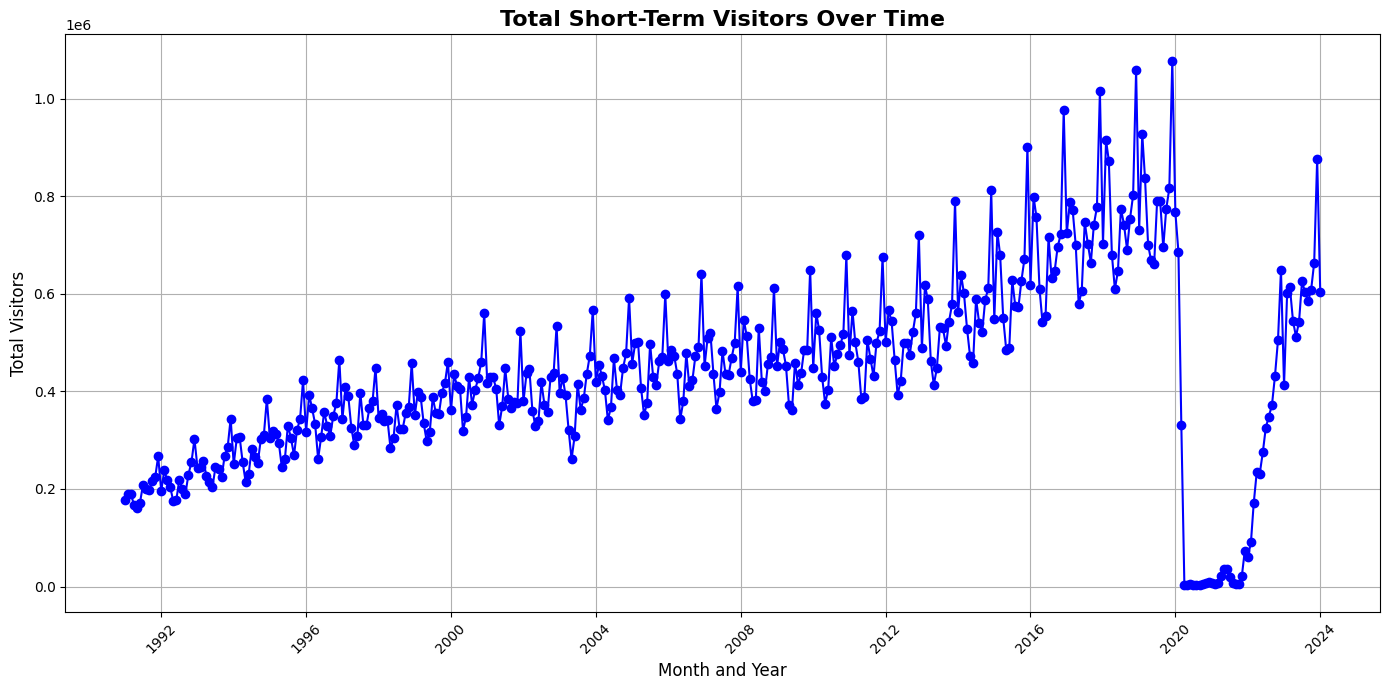

In [2]:
import matplotlib.pyplot as plt

column_labels = {
    'Number of movements ;  Short-term Visitors arriving ;  Under 1 week ;': 'Under 1 week',
    'Number of movements ;  Short-term Visitors arriving ;  1 and under 2 weeks ;': '1-2 weeks',
    'Number of movements ;  Short-term Visitors arriving ;  2 weeks and under 1 month ;': '2 weeks-1 month',
    'Number of movements ;  Short-term Visitors arriving ;  1 and under 2 months ;': '1-2 months',
    'Number of movements ;  Short-term Visitors arriving ;  2 and under 3 months ;': '2-3 months',
    'Number of movements ;  Short-term Visitors arriving ;  3 and under 6 months ;': '3-6 months',
    'Number of movements ;  Short-term Visitors arriving ;  6 and under 12 months ;': '6-12 months',
    'Number of movements ;  Short-term Visitors arriving ;  Total (Duration of stay in days) ;': 'Total by Duration',
    'Number of movements ;  Short-term Visitors arriving ;  Convention/conference ;': 'Convention/conference',
    'Number of movements ;  Short-term Visitors arriving ;  Business ;': 'Business',
    'Number of movements ;  Short-term Visitors arriving ;  Visiting friends/relatives ;': 'Visiting friends/relatives',
    'Number of movements ;  Short-term Visitors arriving ;  Holiday ;': 'Holiday',
    'Number of movements ;  Short-term Visitors arriving ;  Employment ;': 'Employment',
    'Number of movements ;  Short-term Visitors arriving ;  Education ;': 'Education',
    'Number of movements ;  Short-term Visitors arriving ;  Other & not stated ;': 'Other/not stated',
    'Number of movements ;  Short-term Visitors arriving ;  Total (Reason for Journey) ;': 'Total by Reason'
}

data.rename(columns=column_labels, inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(data['Unnamed: 0'], data['Total by Duration'], marker='o', linestyle='-', color='blue')
plt.title('Total Short-Term Visitors Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Total Visitors', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


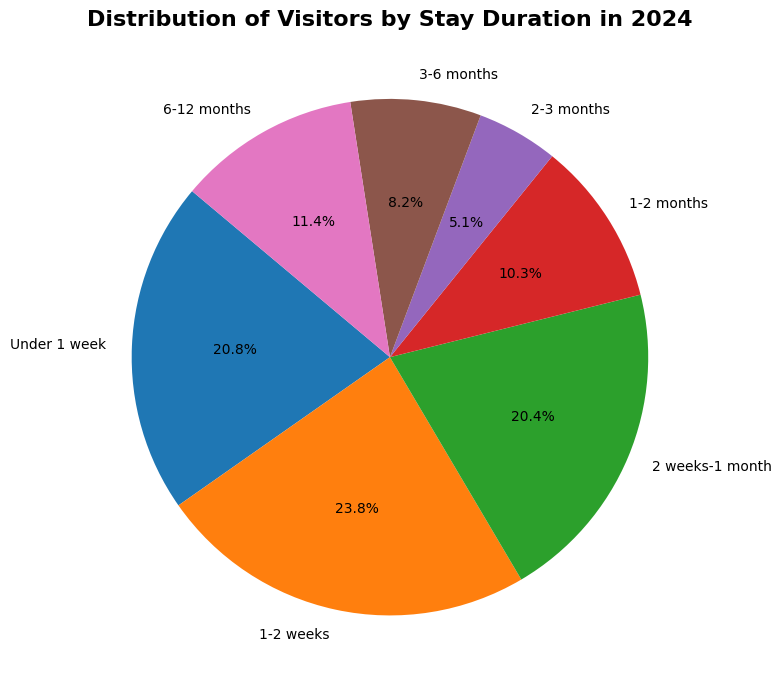

In [3]:
data['Year'] = data['Unnamed: 0'].dt.year

most_recent_year = data['Year'].max()

yearly_data = data[data['Year'] == most_recent_year][['Under 1 week', '1-2 weeks', '2 weeks-1 month', '1-2 months', '2-3 months', '3-6 months', '6-12 months']].sum()

plt.figure(figsize=(10, 7))
plt.pie(yearly_data, labels=yearly_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Visitors by Stay Duration in {most_recent_year}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


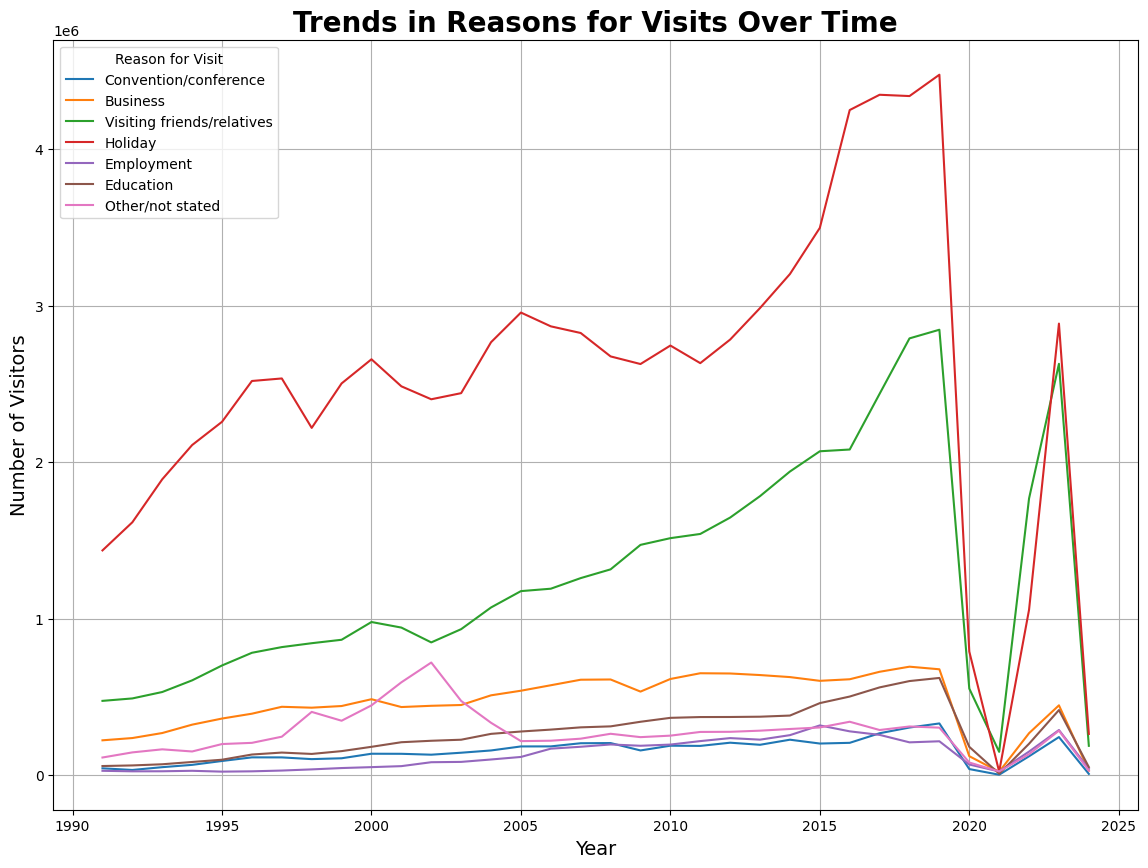

In [4]:
import seaborn as sns

reasons_columns = ['Convention/conference', 'Business', 'Visiting friends/relatives', 'Holiday', 'Employment', 'Education', 'Other/not stated']
yearly_reasons = data.groupby('Year')[reasons_columns].sum().reset_index()

plt.figure(figsize=(14, 10))
for reason in reasons_columns:
    sns.lineplot(data=yearly_reasons, x='Year', y=reason, label=reason)
plt.title('Trends in Reasons for Visits Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.legend(title='Reason for Visit')
plt.grid(True)
plt.show()


<ipython-input-5-628e949bffce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_data_2023.index, y=monthly_data_2023.values, palette='viridis')


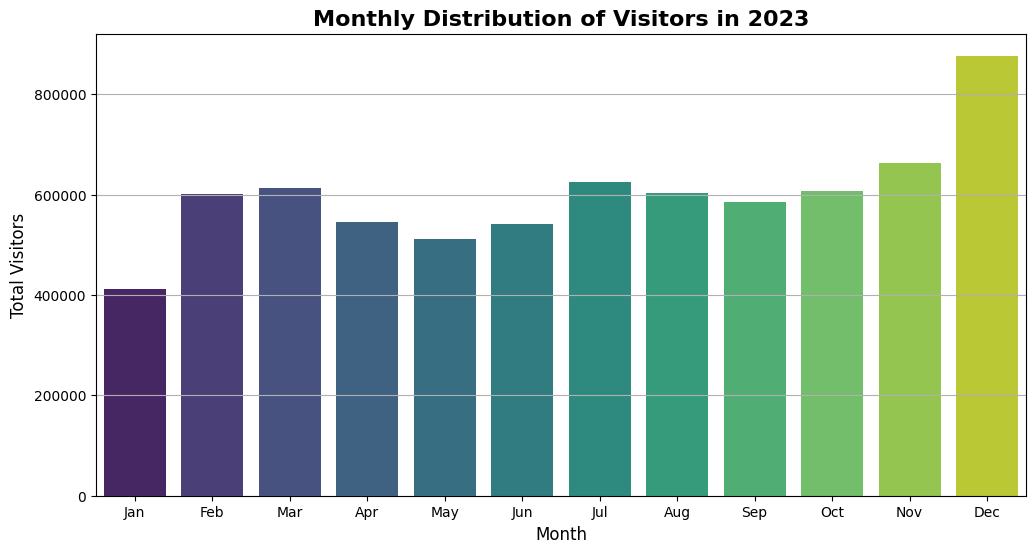

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Year' and 'Month' columns are properly created from the 'Unnamed: 0' column
data['Year'] = data['Unnamed: 0'].dt.year
data['Month'] = data['Unnamed: 0'].dt.month

# Recalculate the monthly data for 2023
monthly_data_2023 = data[data['Year'] == 2023].groupby('Month')['Total by Duration'].sum()

# Generate the bar chart for monthly visitor numbers in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_data_2023.index, y=monthly_data_2023.values, palette='viridis')
plt.title('Monthly Distribution of Visitors in 2023', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Visitors', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


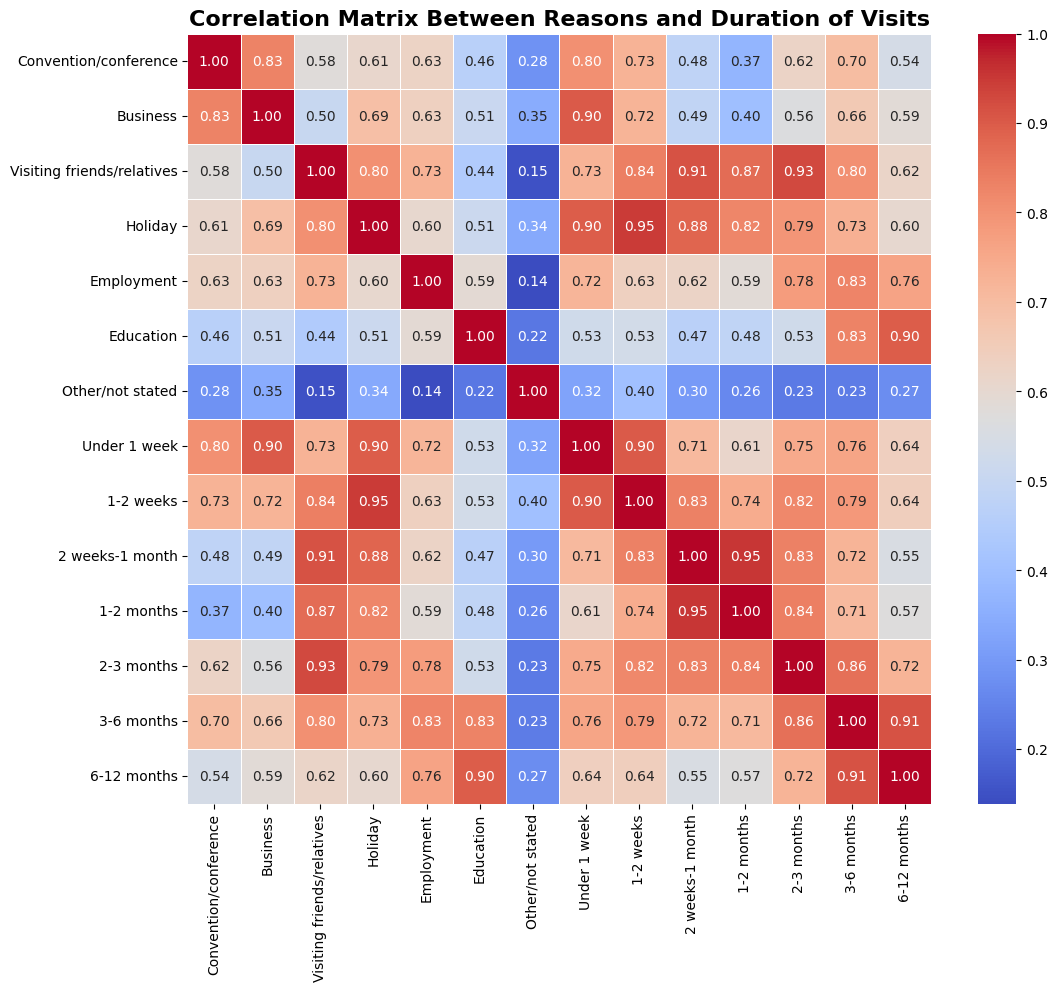

In [6]:
correlation_data = data[reasons_columns + ['Under 1 week', '1-2 weeks', '2 weeks-1 month', '1-2 months', '2-3 months', '3-6 months', '6-12 months']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Between Reasons and Duration of Visits', fontsize=16, fontweight='bold')
plt.show()


<ipython-input-7-8707345a5a1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total by Duration', data=annual_summary, palette='magma')


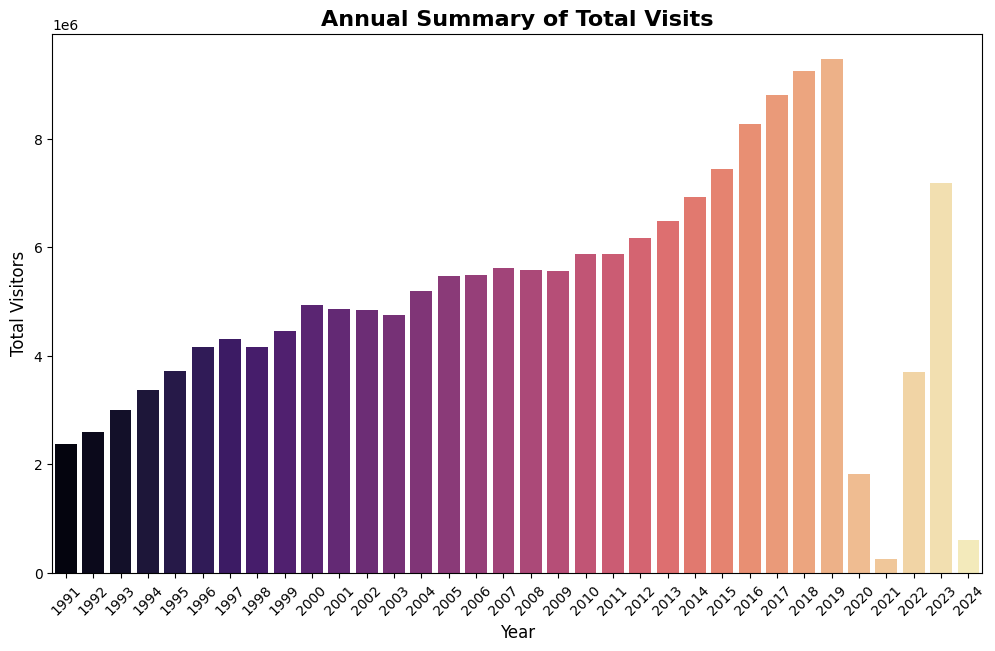

In [7]:
annual_summary = data.groupby('Year')['Total by Duration'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Year', y='Total by Duration', data=annual_summary, palette='magma')
plt.title('Annual Summary of Total Visits', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Visitors', fontsize=12)
plt.xticks(rotation=45)
plt.show()


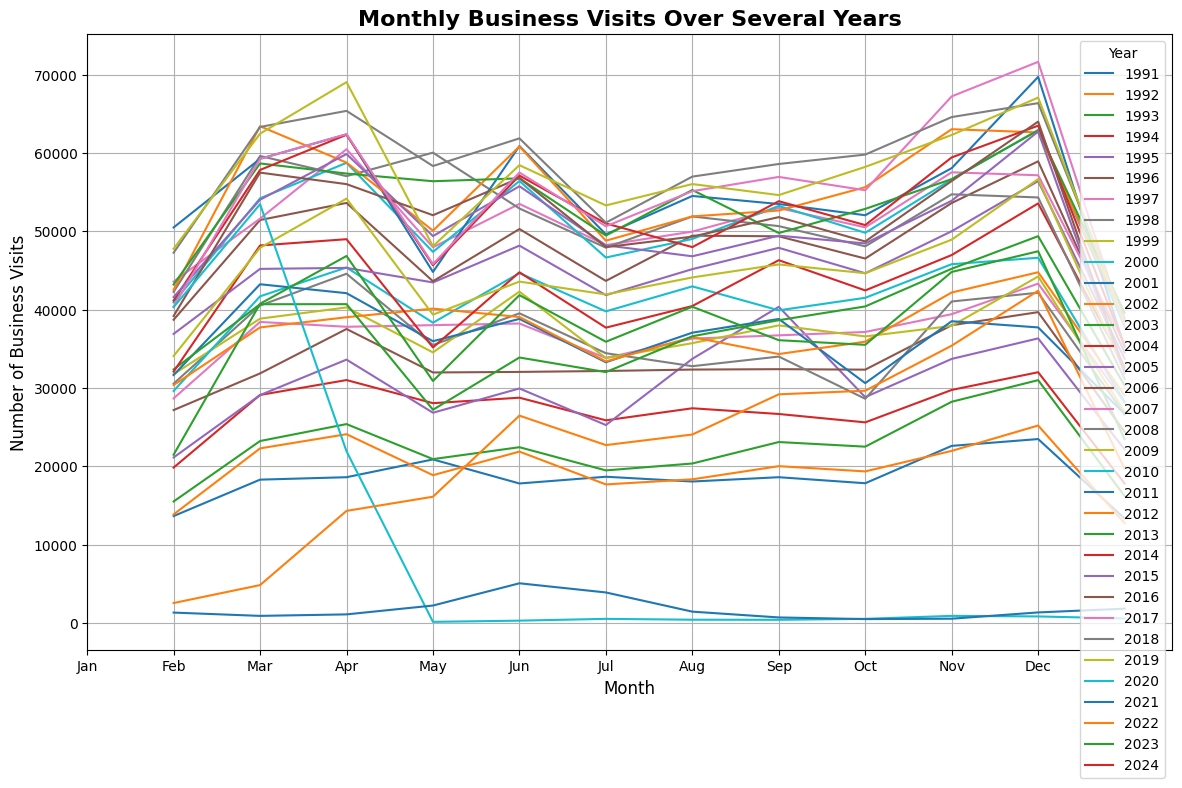

In [8]:
business_trend = data.pivot_table(index='Month', columns='Year', values='Business', aggfunc='sum')

plt.figure(figsize=(14, 8))
for year in business_trend.columns:
    sns.lineplot(x=business_trend.index, y=business_trend[year], label=str(year))
plt.title('Monthly Business Visits Over Several Years', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Business Visits', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


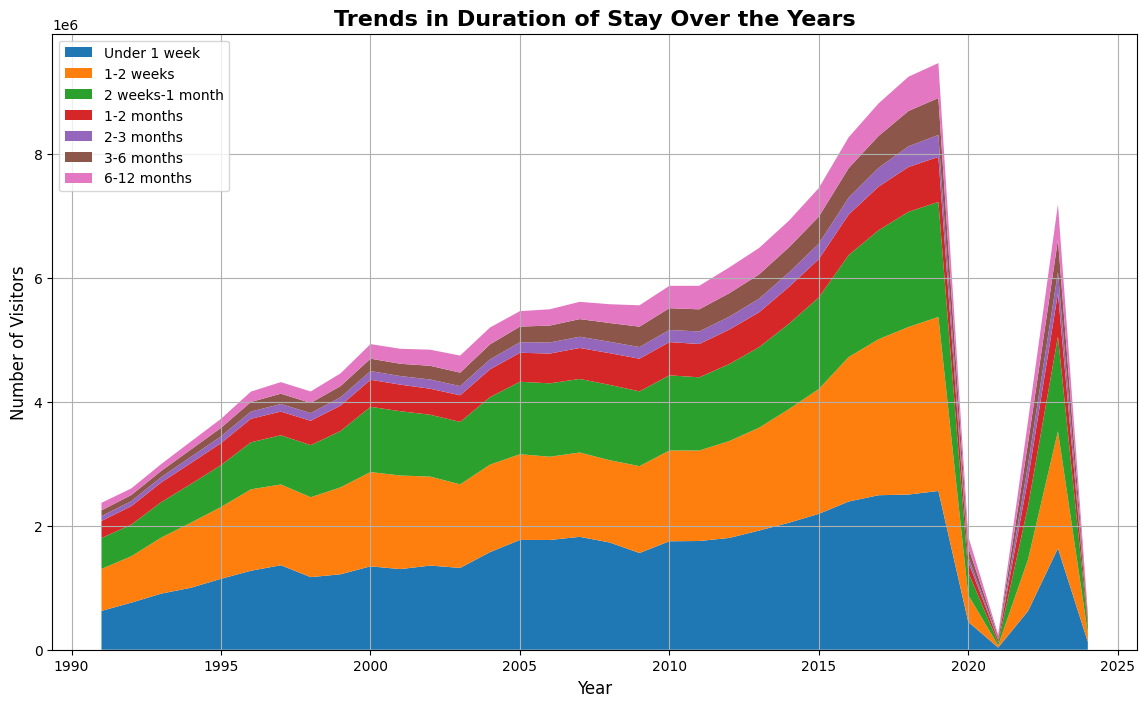

In [9]:
duration_trends = data.groupby('Year')[['Under 1 week', '1-2 weeks', '2 weeks-1 month', '1-2 months', '2-3 months', '3-6 months', '6-12 months']].sum()

plt.figure(figsize=(14, 8))
plt.stackplot(duration_trends.index, duration_trends['Under 1 week'], duration_trends['1-2 weeks'], duration_trends['2 weeks-1 month'],
              duration_trends['1-2 months'], duration_trends['2-3 months'], duration_trends['3-6 months'], duration_trends['6-12 months'],
              labels=['Under 1 week', '1-2 weeks', '2 weeks-1 month', '1-2 months', '2-3 months', '3-6 months', '6-12 months'])
plt.title('Trends in Duration of Stay Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


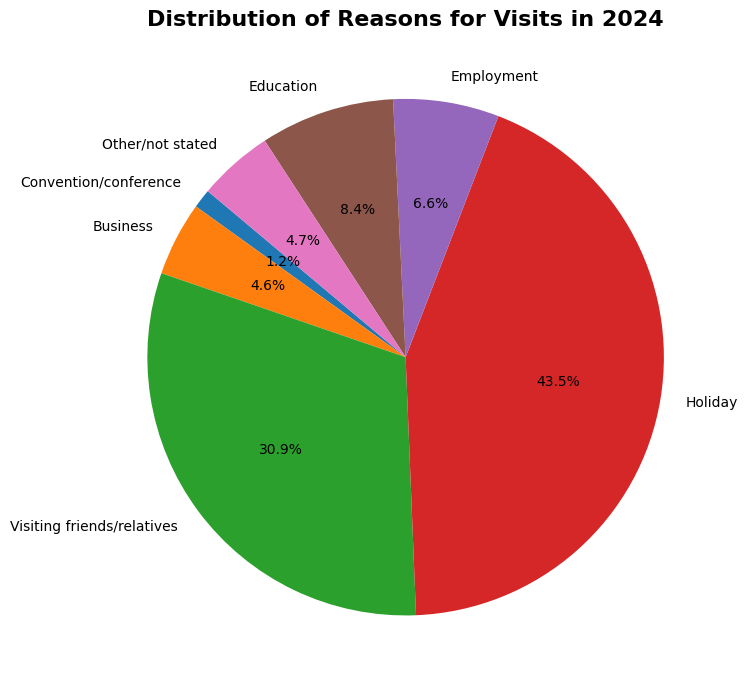

In [10]:
recent_year_reasons = data[data['Year'] == most_recent_year][reasons_columns].sum()

plt.figure(figsize=(10, 7))
plt.pie(recent_year_reasons, labels=recent_year_reasons.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Reasons for Visits in {most_recent_year}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


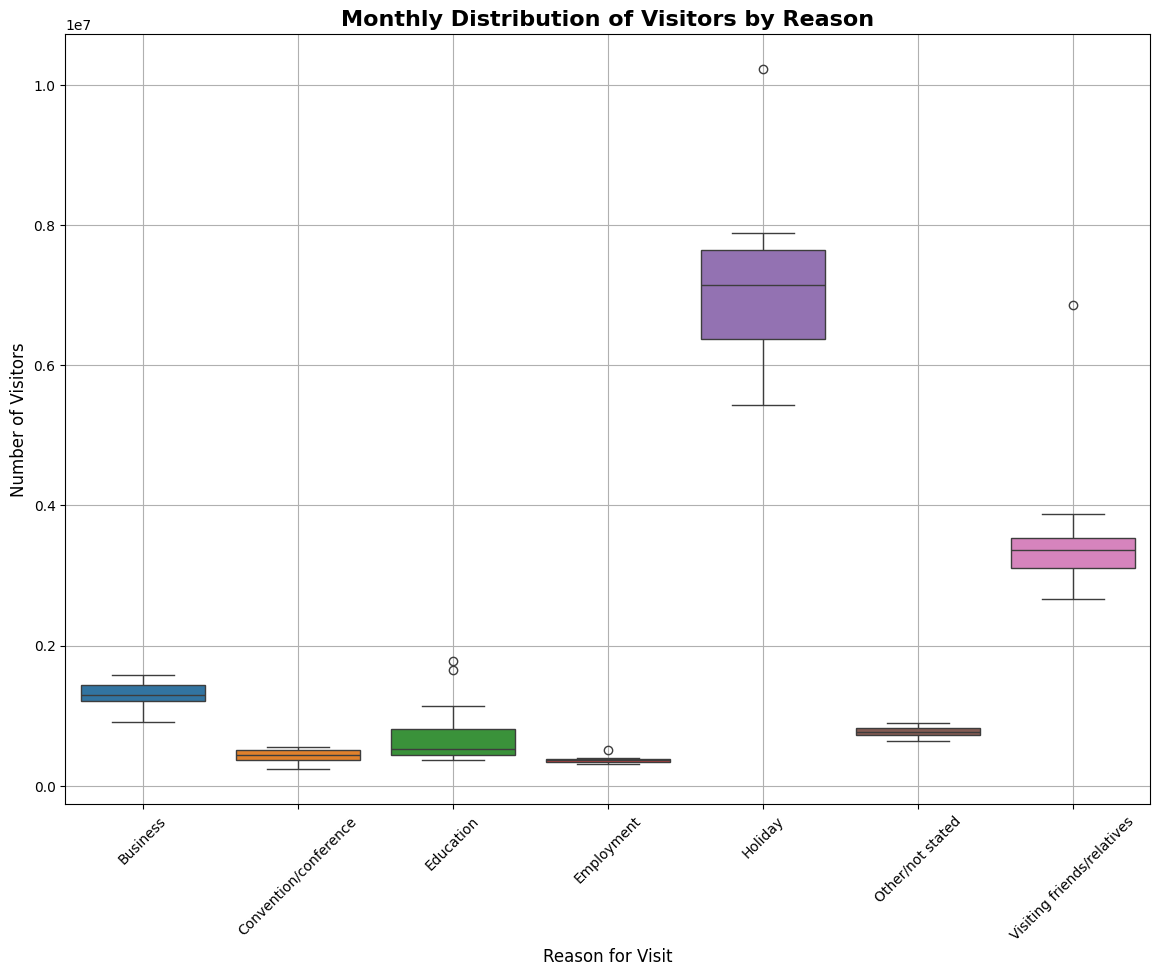

In [11]:
monthly_reasons_data = data.pivot_table(index='Month', values=reasons_columns, aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.boxplot(data=monthly_reasons_data)
plt.title('Monthly Distribution of Visitors by Reason', fontsize=16, fontweight='bold')
plt.xlabel('Reason for Visit', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()